### Import Libraries and Load the Data

In [8]:
#data manipulation
import numpy as np
import pandas as pd
import tqdm
#file and system operations
import os
import sys
assert sys.version_info >= (3,5)
#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plots
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['xtick.labelsize']=12
#handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#view all the columns
pd.options.display.max_columns = None
#basic text manipulation libraries
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

### Load the Reviews Data

In [9]:
reviews = pd.read_csv('K8 Reviews v0.2.csv',delimiter=',',engine='python')
reviews.head(3)

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...


In [10]:
#check the number of reviews 
len(reviews)

14675

In [11]:
#check the basic info
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [14]:
#check the sentiment labels
reviews['sentiment'].value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

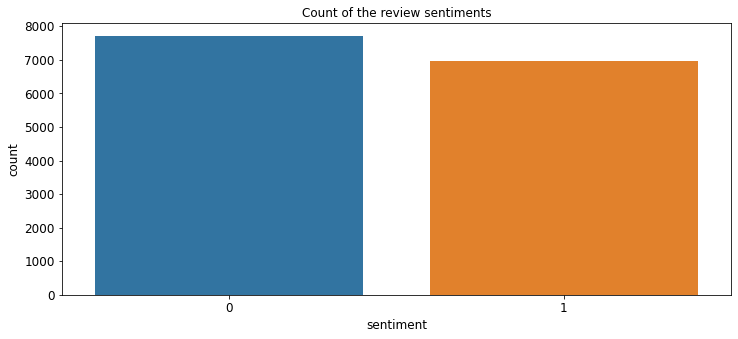

In [24]:
sns.countplot(x ='sentiment', data = reviews)
plt.title('Count of the review sentiments')
plt.show()

In [25]:
#check randomly any of the reviews
random = np.random.randint(1,len(reviews))
print(reviews['review'][random])

Bought this phone, and within 3 months its front ear speaker failed. I was not expecting this quality of hardware from lenovo.This happened within warranty, how can I get a replacement?


### Text Preprocessing
_Following steps will be performed_
- _Tokenization - Split the text into sentences and sentences into words. Lowercase the words and remove any punctuation_
- _Words that are fewer than 3 characters will be removed_
- _All stopwords will be removed_
- _Words are lemmatized - words in third person are changed to first person and words in future and past tense are changed to present tense_
- _Words are stemmed - words are reduced to the root form_

In [26]:
#load the gensim library
import gensim

In [29]:
# Write a function to proprocess the entire dataset 

stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    #This function will lemmatize on Noun POS and stem the text
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='n'))
    #return (WordNetLemmatizer().lemmatize(text,pos='n'))

#tokenize and lemmatize
def preprocess(text):
    #Function to break into word tokens, remove stopwords, remove short words and finally to lemmatize and stem the individual tokens
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [30]:
#check for a sample review
result = preprocess('The worst camera I have ever seen. Even my very old configuration mobile phone had a better camera resolution. Battery draining faster.')
print(result)

['worst', 'camera', 'seen', 'configur', 'mobil', 'phone', 'better', 'camera', 'resolut', 'batteri', 'drain', 'faster']


In [31]:
processed_docs = []

#uncomment below line to find the topics for a particular sentiment
#reviews = reviews[reviews['sentiment']==1]

for doc in reviews['review']:
    processed_docs.append(preprocess(doc))

In [32]:
print(processed_docs[:10])

[['good', 'need', 'updat', 'improv'], ['worst', 'mobil', 'bought', 'batteri', 'drain', 'like', 'hell', 'backup', 'hour', 'internet', 'us', 'mobil', 'idl', 'get', 'discharg', 'biggest', 'amazon', 'lenov', 'expect', 'make', 'say', 'batteri', 'booster', 'charger', 'fake', 'take', 'hour', 'fulli', 'charg', 'know', 'lenovo', 'surviv', 'make', 'regret', 'like'], ['cash', 'januari'], ['good'], ['worst', 'phone', 'everthey', 'chang', 'phone', 'problem', 'amazon', 'return', 'phone', 'high', 'disappoint', 'amazon'], ['tell', 'buyi', 'total', 'batterypoor', 'camerawast', 'money'], ['phone', 'awesom', 'charg', 'heat', 'allot', 'genuin', 'reason', 'hate', 'lenovo', 'note'], ['batteri', 'level', 'worn'], ['hit', 'problem', 'phone', 'hang', 'problem', 'lenovo', 'note', 'servic', 'station', 'ahmedabad', 'year', 'warranti', 'chang', 'phone', 'lenovo'], ['glitch', 'dont', 'thing', 'better', 'option']]


### Bag of Words on the Dataset

In [33]:
# Create a dictionary of the words which appear in the entire corpus

dictionary = gensim.corpora.Dictionary(processed_docs)

In [34]:
dictionary.keys()[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [35]:
#print a few words in the dictionary
count = 0
for k,v in dictionary.iteritems():
    print(k,v)
    count = count + 1
    if count > 10:
        break

0 good
1 improv
2 need
3 updat
4 amazon
5 backup
6 batteri
7 biggest
8 booster
9 bought
10 charg


### Gensim filter extremes
- Remove or filter the words that appear less than nobelow
- Remove or filter the words that apepar more than noabove (fraction)
- After the above two steps keep only the n most frequent tokens or keep all

In [37]:
dictionary.filter_extremes(no_below=5,no_above=0.1,keep_n=None)

### Gensim doc2bow
- Create a bag of words for each document ie for each document we create a dictionary reporting how many words and how many times those words appear

In [38]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

In [39]:
bow_corpus[10:20]

[[(57, 1)],
 [(9, 1), (58, 1), (59, 1)],
 [(60, 1), (61, 1), (62, 1), (63, 1)],
 [(29, 1), (35, 2), (59, 1), (61, 1), (64, 1), (65, 1)],
 [(4, 1), (66, 1), (67, 1), (68, 1), (69, 1)],
 [(70, 1), (71, 1)],
 [(72, 1), (73, 1), (74, 1), (75, 1)],
 [(3, 2),
  (7, 1),
  (76, 1),
  (77, 2),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 2),
  (85, 1),
  (86, 1)],
 [(11, 1), (20, 1), (38, 1), (61, 1), (87, 1), (88, 1), (89, 1)],
 [(90, 1)]]

In [40]:
document_num = random
bow_doc_x = bow_corpus[random]

for i in range(len(bow_doc_x)):
    print(f'Word {bow_doc_x[i][0]} {dictionary[bow_doc_x[i][0]]} appears {bow_doc_x[i][1]} times')

Word 7 bought appears 1 times
Word 12 expect appears 1 times
Word 50 warranti appears 1 times
Word 59 month appears 1 times
Word 92 speaker appears 1 times
Word 136 qualiti appears 1 times
Word 155 happen appears 1 times
Word 211 hardwar appears 1 times
Word 267 replac appears 1 times
Word 975 fail appears 1 times


### Running LDA using Bag of Words

In [41]:
#apply the gensim LDA model and generate 12 topics from the corpus
seed = 41
lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=12,id2word=dictionary,passes=10,workers=2,
                                      random_state=seed,minimum_probability=0.05,alpha='symmetric')

In [42]:
# For each topic, explore each word and its relative weight in the topic

for idx,topic in lda_model.print_topics(-1,num_words=15):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.079*"charger" + 0.075*"great" + 0.056*"updat" + 0.034*"charg" + 0.034*"turbo" + 0.022*"life" + 0.021*"month" + 0.021*"receiv" + 0.020*"oreo" + 0.019*"slow" + 0.016*"perform" + 0.016*"piec" + 0.013*"android" + 0.013*"long" + 0.013*"fast"


Topic: 1 
Words: 0.137*"charg" + 0.050*"fast" + 0.045*"drain" + 0.044*"hour" + 0.034*"time" + 0.031*"get" + 0.031*"take" + 0.020*"turbo" + 0.020*"glass" + 0.017*"issu" + 0.013*"screen" + 0.013*"gorilla" + 0.011*"backup" + 0.011*"poor" + 0.011*"mark"


Topic: 2 
Words: 0.121*"problem" + 0.080*"issu" + 0.047*"network" + 0.024*"face" + 0.021*"connect" + 0.020*"hang" + 0.020*"updat" + 0.016*"time" + 0.015*"month" + 0.014*"automat" + 0.014*"replac" + 0.013*"get" + 0.013*"need" + 0.013*"restart" + 0.013*"softwar"


Topic: 3 
Words: 0.051*"amazon" + 0.050*"servic" + 0.036*"return" + 0.031*"like" + 0.025*"day" + 0.024*"purchas" + 0.024*"replac" + 0.020*"poor" + 0.020*"devic" + 0.016*"custom" + 0.016*"worst" + 0.015*"center" + 0.012*"month" 

In [43]:
#import Coherence model from gensim
from gensim.models import CoherenceModel
#compute coherence score
lda_model_coherence = CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,
                                    coherence='c_v')
coherence_lda = lda_model_coherence.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.6130453055541988


### Hyperparameter Tuning
- Number of topics K
- Dirichlet hyperparamater alpha: Document Topic Density
- Dirichlet hyperparameter beta: Word-Topic Density

In [44]:
#define a helper function
def compute_coherence_score(corpus,dictionary,k,a):
    #instantiate the model instance based on k,a and b
    lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=dictionary,num_topics=k,alpha=a,
                                           passes=10,
                                           random_state=seed)
    lda_model_coherence = CoherenceModel(model=lda_model,texts=processed_docs,dictionary=dictionary,coherence='c_v')
    return lda_model_coherence.get_coherence()

In [45]:
#search for the best alpha and the number of topics --> one with the highest coherence score will be the best hyperparameter
alpha =['symmetric','asymmetric']

for x in alpha:
    print('Coherence Model with alpha = {}'.format(x))
    print('-------------------------------------------')
    print('\n')
    for i in range(5,10):
        score = compute_coherence_score(corpus=bow_corpus,dictionary=dictionary,k=i,a=x)        
        print(f'Coherence score with {i} topics is {score}')
        print('\n')

Coherence Model with alpha = symmetric
-------------------------------------------


Coherence score with 5 topics is 0.5524774889617711


Coherence score with 6 topics is 0.5778186963451422


Coherence score with 7 topics is 0.5834156429368329


Coherence score with 8 topics is 0.5717499155269417


Coherence score with 9 topics is 0.5773290057857315


Coherence Model with alpha = asymmetric
-------------------------------------------


Coherence score with 5 topics is 0.6164569193392028


Coherence score with 6 topics is 0.5973766658201377


Coherence score with 7 topics is 0.5952802992706328


Coherence score with 8 topics is 0.5995738594285046


Coherence score with 9 topics is 0.5896347807983504




In [46]:
'''
Though the model with alpha='asymmetric' and with 12 topics returned the highest coherence score. For the business use and simplicity, max topics of 7
and alpha='asymmetric' as the final model. This also returned a comparable coherence score of 0.6262
'''
lda_model_final = gensim.models.LdaMulticore(corpus=bow_corpus,num_topics=7,id2word=dictionary,passes=10,workers=2,alpha='asymmetric')

In [47]:
from pprint import pprint
# Print the Keyword in the 7 topics
pprint(lda_model_final.print_topics())
doc_lda = lda_model_final[bow_corpus]

[(0,
  '0.056*"nice" + 0.042*"qualiti" + 0.031*"perform" + 0.028*"awesom" + '
  '0.022*"poor" + 0.022*"backup" + 0.018*"excel" + 0.017*"sound" + '
  '0.016*"dual" + 0.015*"featur"'),
 (1,
  '0.048*"best" + 0.045*"note" + 0.039*"price" + 0.029*"better" + 0.023*"like" '
  '+ 0.019*"issu" + 0.017*"devic" + 0.016*"rang" + 0.014*"perform" + '
  '0.012*"great"'),
 (2,
  '0.064*"amazon" + 0.048*"worst" + 0.035*"servic" + 0.035*"return" + '
  '0.028*"wast" + 0.025*"replac" + 0.018*"money" + 0.017*"custom" + '
  '0.015*"want" + 0.014*"purchas"'),
 (3,
  '0.113*"problem" + 0.054*"issu" + 0.043*"network" + 0.029*"connect" + '
  '0.018*"proper" + 0.018*"month" + 0.018*"face" + 0.018*"hang" + 0.017*"time" '
  '+ 0.017*"signal"'),
 (4,
  '0.133*"charg" + 0.049*"drain" + 0.045*"fast" + 0.038*"hour" + 0.036*"get" + '
  '0.032*"charger" + 0.031*"time" + 0.029*"turbo" + 0.029*"take" + '
  '0.019*"issu"'),
 (5,
  '0.085*"money" + 0.068*"screen" + 0.067*"worth" + 0.053*"valu" + '
  '0.050*"glass" + 0.032*

### Topic Classification

- Topic 1: Nice performance for the budget (all the good reviews)
- Topic 2: Problems with battery charge and drain
- Topic 3: Poor quality sound and video
- Topic 4: Reliability issues very early since purchase
- Topic 5: Connectivity Issues
- Topic 6: Poor customer service and replacement service
- Topic 7: Quality and Reliability Issues like phone hangs